## Check experiments Sep.20 and 21.

###  Experiment list

#### 09/ 20&21
- "62585841": Full, 0.1
- "62598599": Log, 1.0
- "62610240": Log. 1.0 (fix mean position)
- "62610249": Log. 10.0 ("same above")
- "62598522" + "62616795": Native 1.0, ~No.4epochs + ~No.21epochs = 27 epochs
#### 09/ 22 ongoing
- ""

In [1]:
%matplotlib inline
import os
import gc
import sys
import glob
import math
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.examples.tutorials.mnist import input_data
from IPython.display import Image, display_png
# dataset pipeline in train
from train_debug import input_fn, make_copy_rotate_image
from train_debug import rotate_operation # rotate one angle
from train_debug import rotate_fn # rotate random angle

In [2]:
def load_model(model_dir, epoch, mtype):
    print(" Load {} at {} epoch".format(mtype, epoch))
    model_def = model_dir+'/'+mtype+'.json'
    model_weight = model_dir+'/'+mtype+'-'+str(epoch)+'.h5'
    with open(model_def, "r") as f:
        model = tf.keras.models.model_from_json(f.read())
    model.load_weights(model_weight)
    return model

In [3]:
def resize_fn(img, height=32, width=32):
    return tf.image.resize_images(img, (height, width))

In [4]:
def get_loss(log_fname):
    # check ltrain-reconst-oss curve
    fname = './log/'+log_fname
    loss_list = []
    with open(fname,'r') as f:
        lines = f.readlines()
        for line in lines:
            tmps = []
            for iline in line.split('\n'):
                for _line in iline.split(','):
                    if len(_line) > 0:
                        tmps.append(float(_line))
            loss_list.append(np.array(tmps))
    
    n = len(loss_list)
    loss_array = np.zeros((n,2))
    loss_array = loss_array.astype(float)
    for idx, i in enumerate(loss_list):
        #print(i, len(i))
        for jdx, j in enumerate(i):
            loss_array[idx, jdx] = j
    return loss_array

In [5]:
def _get_loss(log_fname):
    # check ltrain-reconst-oss curve
    fname = './log/'+log_fname
    loss_list = []
    with open(fname,'r') as f:
        lines = f.readlines()
        for line in lines:
            tmps = []
            for iline in line.split('\n'):
                for _line in iline.split(' '):
                    if len(_line) > 0:
                        tmps.append(float(_line))
            loss_list.append(np.array(tmps))
    
    n = len(loss_list)
    loss_array = np.zeros((n,2))
    loss_array = loss_array.astype(float)
    for idx, i in enumerate(loss_list):
        #print(i, len(i))
        for jdx, j in enumerate(i):
            loss_array[idx, jdx] = j
    return loss_array

#### Prep testdata

In [6]:
mnist = input_data.read_data_sets(os.path.abspath("./MNIST_data/"), one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /scratch/midway2/tkurihana/clouds/metrics/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
# data
x_test = mnist.test.images
x_test = x_test.reshape(-1, 28,28,1)
# labels
y_test = mnist.test.labels

# resize
imgs_tf = resize_fn(x_test, height=32, width=32)
# tf2np
test_imgs = tf.keras.backend.eval(imgs_tf)

1. 62585841

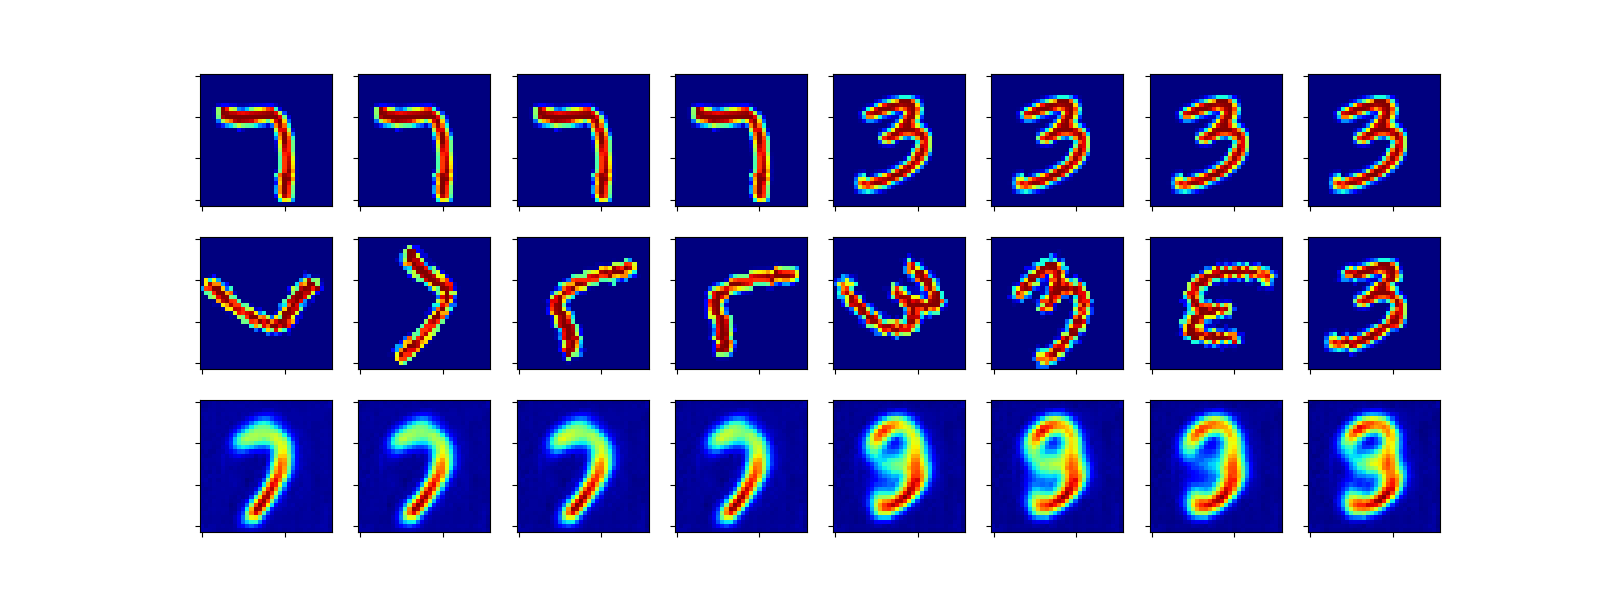

In [8]:
expname='62585841'
display_png(Image(glob.glob('./fig/*'+str(expname)+'*.png')[0]))

In [9]:
logname=os.path.basename(glob.glob('./log/loss*'+str(expname)+'*.txt')[0])
print(os.path.basename(logname))
loss_array = get_loss(logname)

loss_62585841_nepoch-25_lr-0.01_nbatch-32_lambda1.0_dangle11568990694.txt


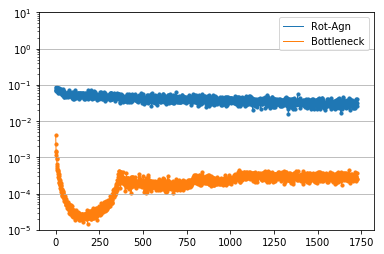

In [10]:
names = ['Rot-Agn', 'Bottleneck']
cs = ["C0", 'C1', "C2"]
for i in range(2):
    x = [ i for i in range(len(loss_array))]
    plt.plot(x,loss_array[:,i], linewidth=1, label=names[i], color=cs[i])
    plt.scatter(x,loss_array[:,i], s=10, color=cs[i])
    plt.yscale('log')
    plt.gca().yaxis.grid(True)
    plt.ylim(1.0e-5,10)
plt.legend()
plt.show()

62598599

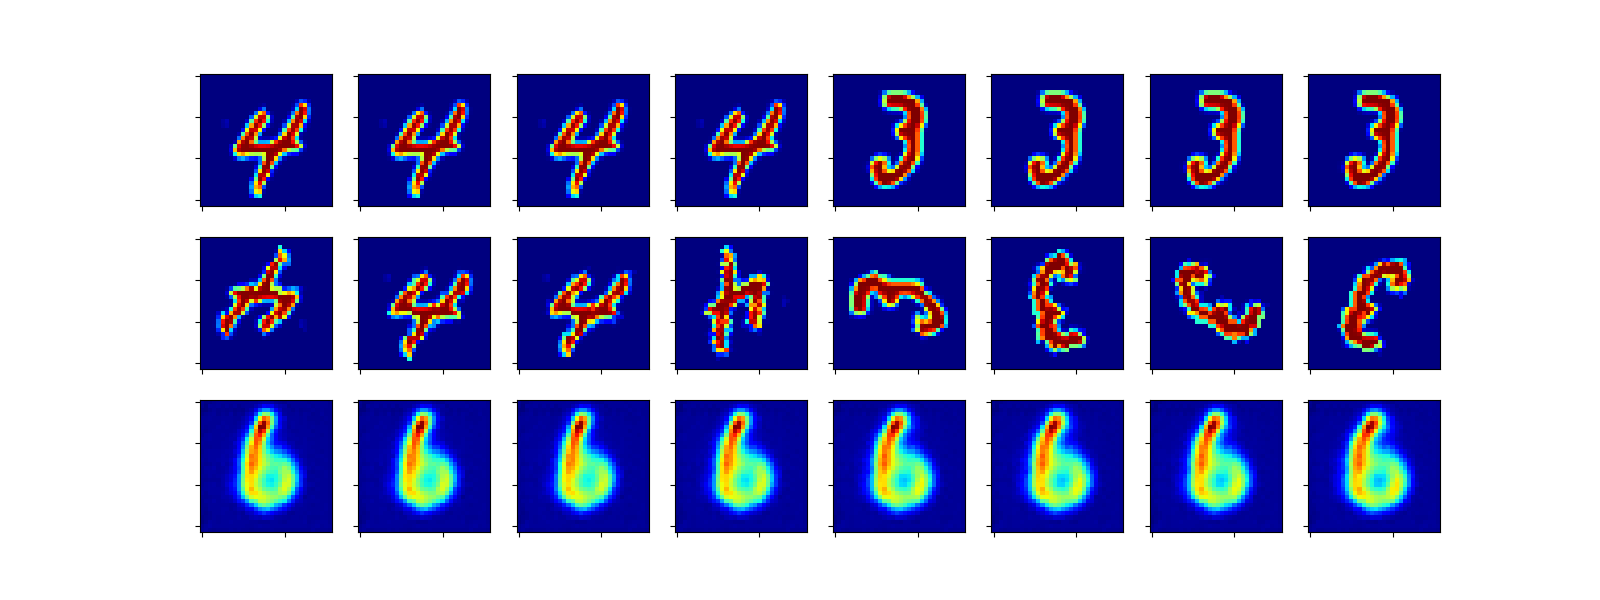

In [11]:
expname='62598599'
display_png(Image(glob.glob('./fig/*'+str(expname)+'*.png')[0]))

In [12]:
logname=os.path.basename(glob.glob('./log/loss*'+str(expname)+'*.txt')[0])
print(os.path.basename(logname))
loss_array = get_loss(logname)

loss_62598599_nepoch-25_lr-0.01_nbatch-32_lambda1.0_dangle11569009698.txt


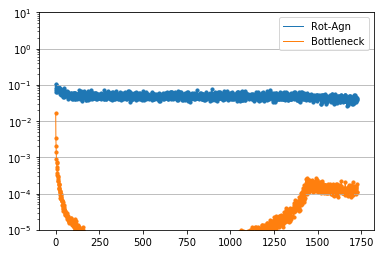

In [13]:
names = ['Rot-Agn', 'Bottleneck']
cs = ["C0", 'C1', "C2"]
for i in range(2):
    x = [ i for i in range(len(loss_array))]
    plt.plot(x,loss_array[:,i], linewidth=1, label=names[i], color=cs[i])
    plt.scatter(x,loss_array[:,i], s=10, color=cs[i])
    plt.yscale('log')
    plt.gca().yaxis.grid(True)
    plt.ylim(1.0e-5,10)
plt.legend()
plt.show()

62610240

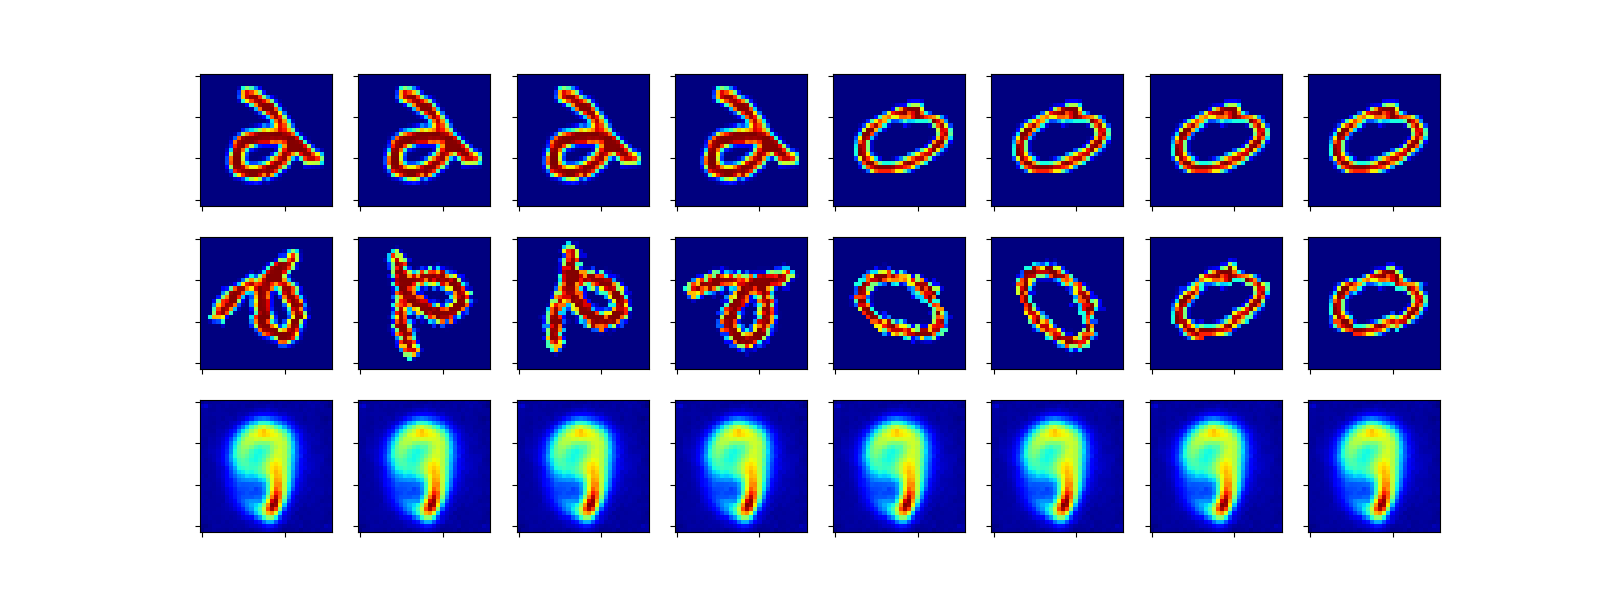

In [14]:
expname='62610240'
display_png(Image(glob.glob('./fig/*'+str(expname)+'*.png')[0]))

In [15]:
logname=os.path.basename(glob.glob('./log/loss*'+str(expname)+'*.txt')[0])
print(os.path.basename(logname))
loss_array = get_loss(logname)

loss_62610240_nepoch-25_lr-0.01_nbatch-32_lambda1.0_dangle11569079498.txt


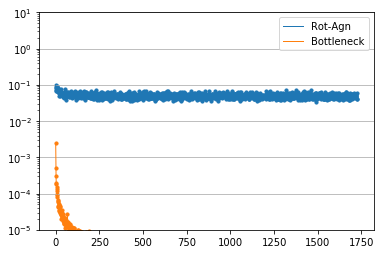

In [16]:
names = ['Rot-Agn', 'Bottleneck']
cs = ["C0", 'C1', "C2"]
for i in range(2):
    x = [ i for i in range(len(loss_array))]
    plt.plot(x,loss_array[:,i], linewidth=1, label=names[i], color=cs[i])
    plt.scatter(x,loss_array[:,i], s=10, color=cs[i])
    plt.yscale('log')
    plt.gca().yaxis.grid(True)
    plt.ylim(1.0e-5,10)
plt.legend()
plt.show()

62610249

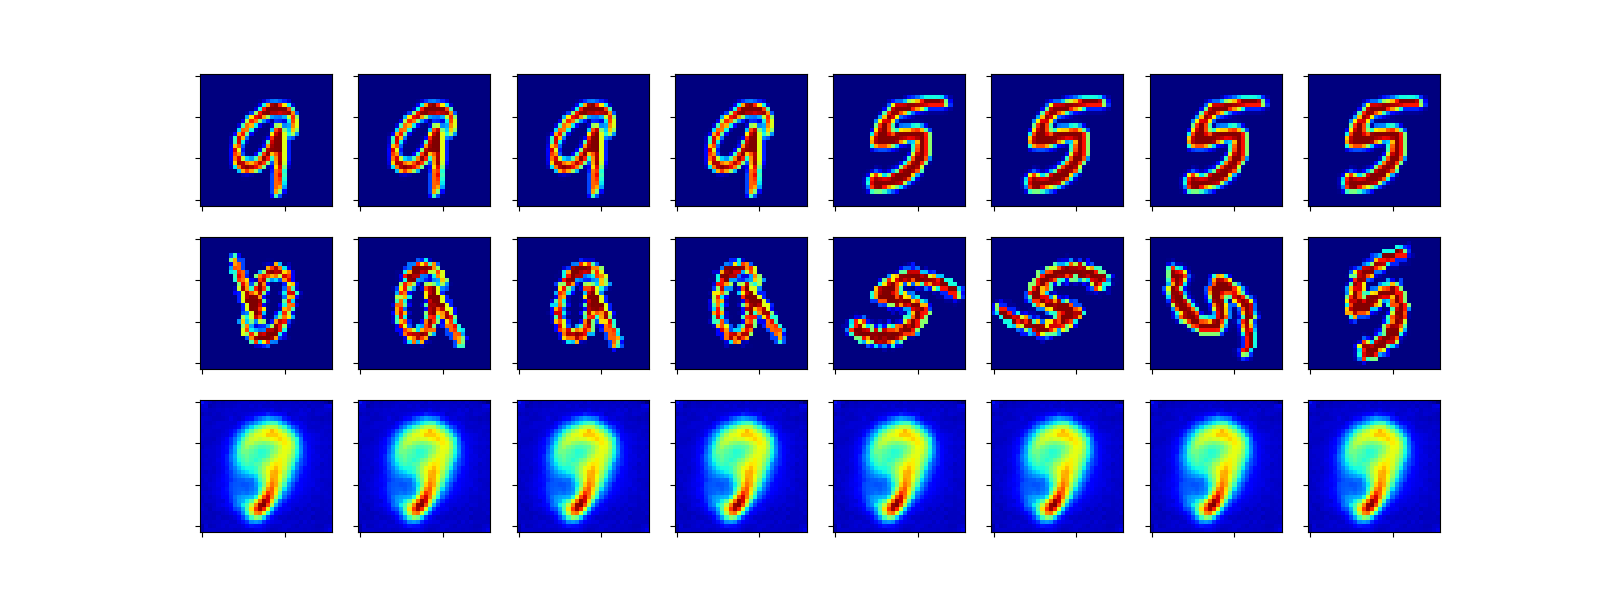

In [17]:
expname='62610249'
display_png(Image(glob.glob('./fig/*'+str(expname)+'*.png')[0]))

In [18]:
logname=os.path.basename(glob.glob('./log/loss*'+str(expname)+'*.txt')[0])
print(os.path.basename(logname))
loss_array = get_loss(logname)

loss_62610249_nepoch-25_lr-0.01_nbatch-32_lambda10.0_dangle11569079639.txt


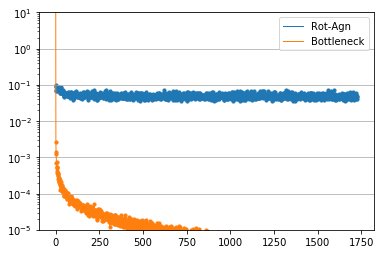

In [19]:
names = ['Rot-Agn', 'Bottleneck']
cs = ["C0", 'C1', "C2"]
for i in range(2):
    x = [ i for i in range(len(loss_array))]
    plt.plot(x,loss_array[:,i], linewidth=1, label=names[i], color=cs[i])
    plt.scatter(x,loss_array[:,i], s=10, color=cs[i])
    plt.yscale('log')
    plt.gca().yaxis.grid(True)
    plt.ylim(1.0e-5,10)
plt.legend()
plt.show()

62616795

In [20]:
expname='62616795'
display_png(Image(glob.glob('./fig/*'+str(expname)+'*.png')[0]))

IndexError: list index out of range

In [21]:
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=21, mtype='encoder')
decoder = load_model(model_dir, epoch=21, mtype='decoder')

 Load encoder at 21 epoch
 Load decoder at 21 epoch


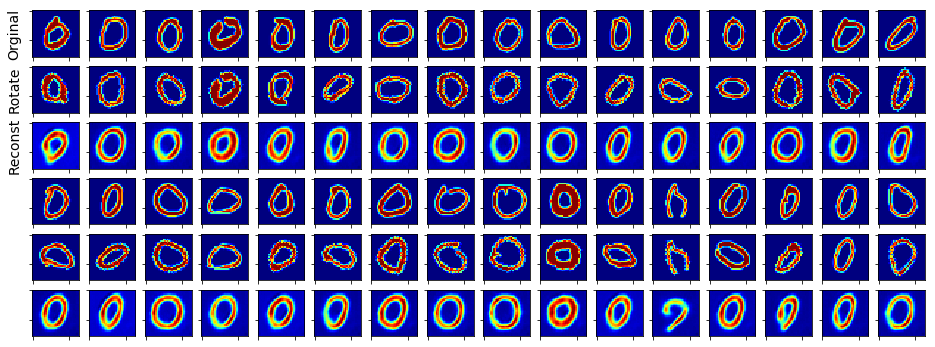

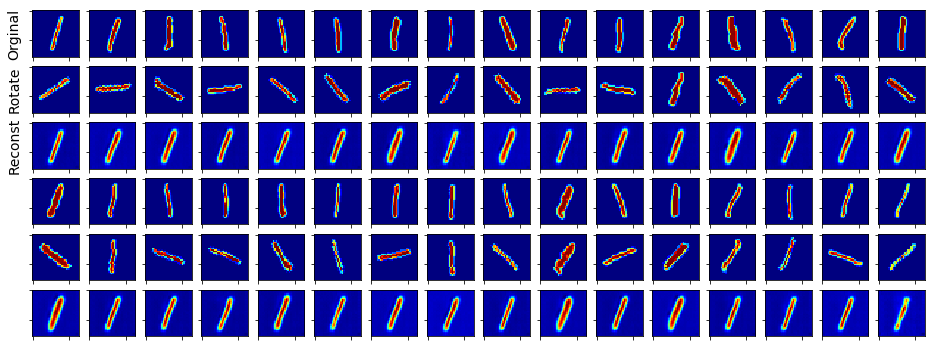

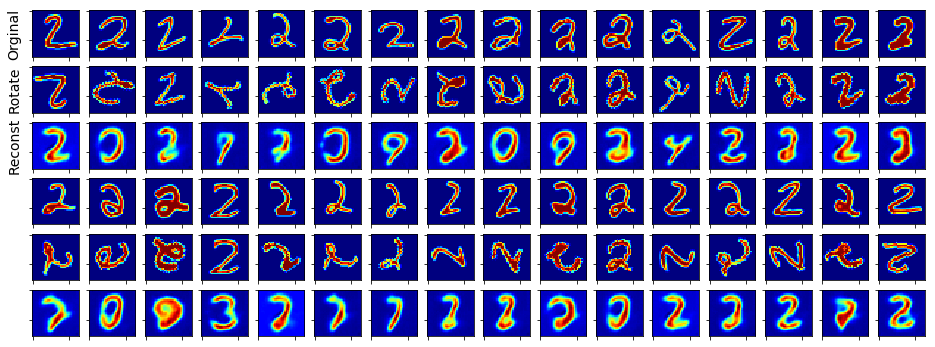

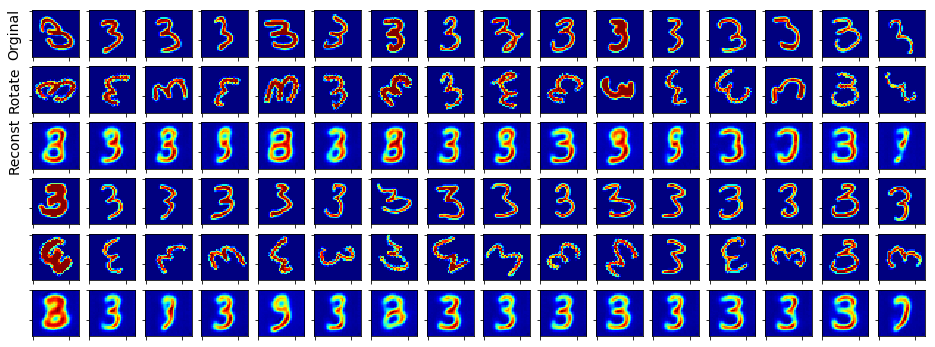

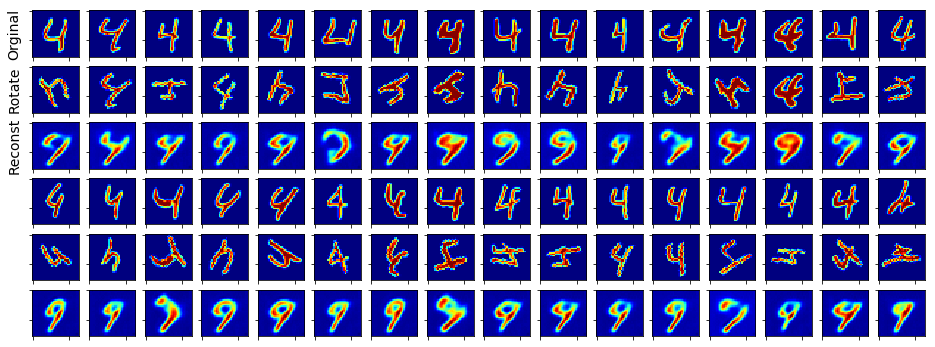

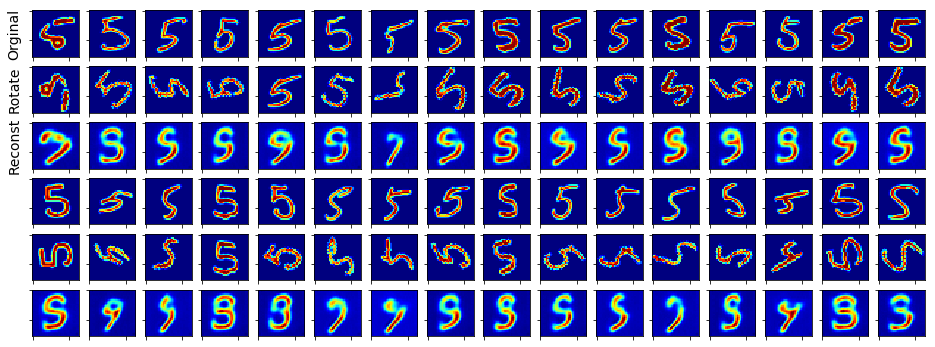

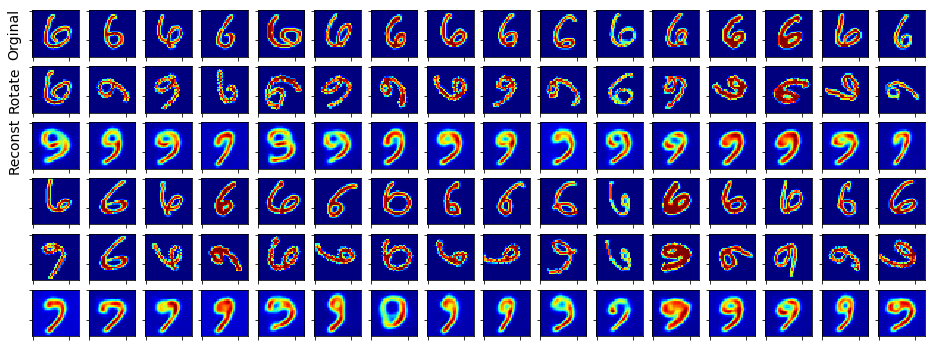

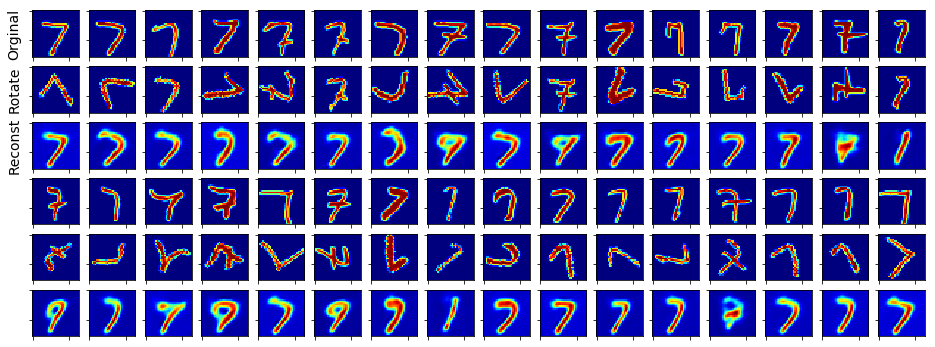

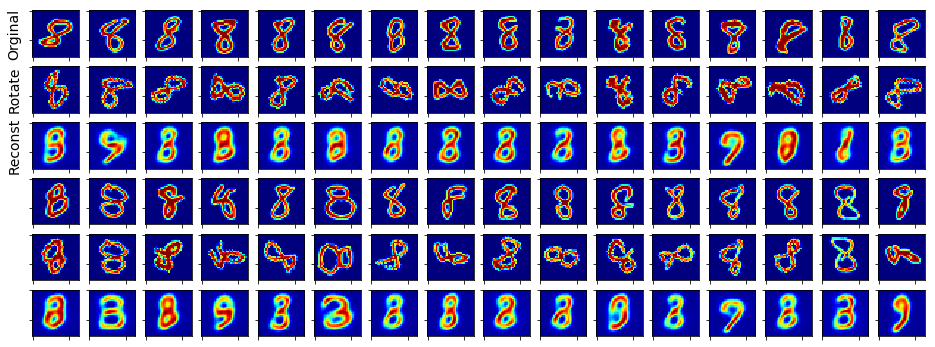

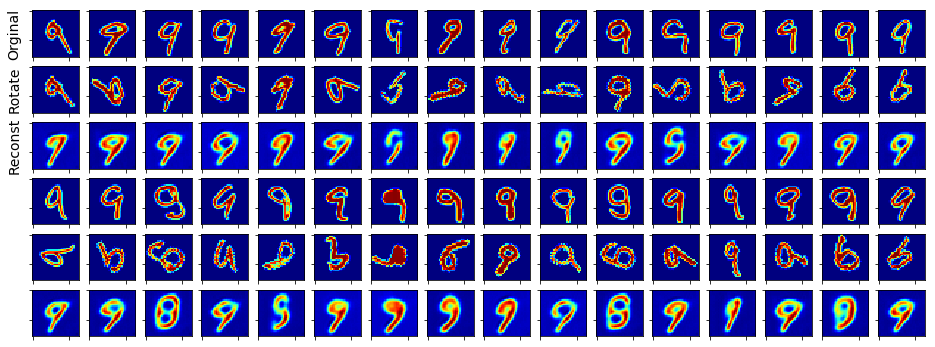

In [22]:
for digit in range(10):
    imgs = test_imgs[np.where(y_test == digit)][:32]
    rimgs_tf = rotate_fn(imgs,seed=np.random.randint(0,999), return_np=False)
    rtest_imgs = tf.keras.backend.eval(rimgs_tf)
    
    #encoded_imgs = encoder.predict(imgs)   # without rotation
    encoded_imgs = encoder.predict(rtest_imgs)    # with rotation
    results = decoder.predict(encoded_imgs)
        
    height, width = 32,32
    num_test_images = 16
    f,a=plt.subplots(6,num_test_images,figsize=(num_test_images,6))
    for idx, i in enumerate(range(num_test_images)):
        a[0][idx].imshow(np.reshape(imgs[i],(height,width)), cmap='jet')
        a[1][idx].imshow(np.reshape(rtest_imgs[i],(height,width)), cmap='jet')
        a[2][idx].imshow(np.reshape(results[i],(height,width)), cmap='jet')
        a[3][idx].imshow(np.reshape(imgs[i+16],(height,width)), cmap='jet')
        a[4][idx].imshow(np.reshape(rtest_imgs[i+16],(height,width)), cmap='jet')
        a[5][idx].imshow(np.reshape(results[i+16],(height,width)), cmap='jet')
            
        if idx == 0:
            label_list = ['Orginal', 'Rotate', 'Reconst']
            for ii in range(3):
                a[ii][idx].set_ylabel(label_list[ii], fontsize=14)
        
        for ii in range(6):
            # set axis turn off
            a[ii][idx].set_xticklabels([])
            a[ii][idx].set_yticklabels([])
    plt.show()

-----------
62628198

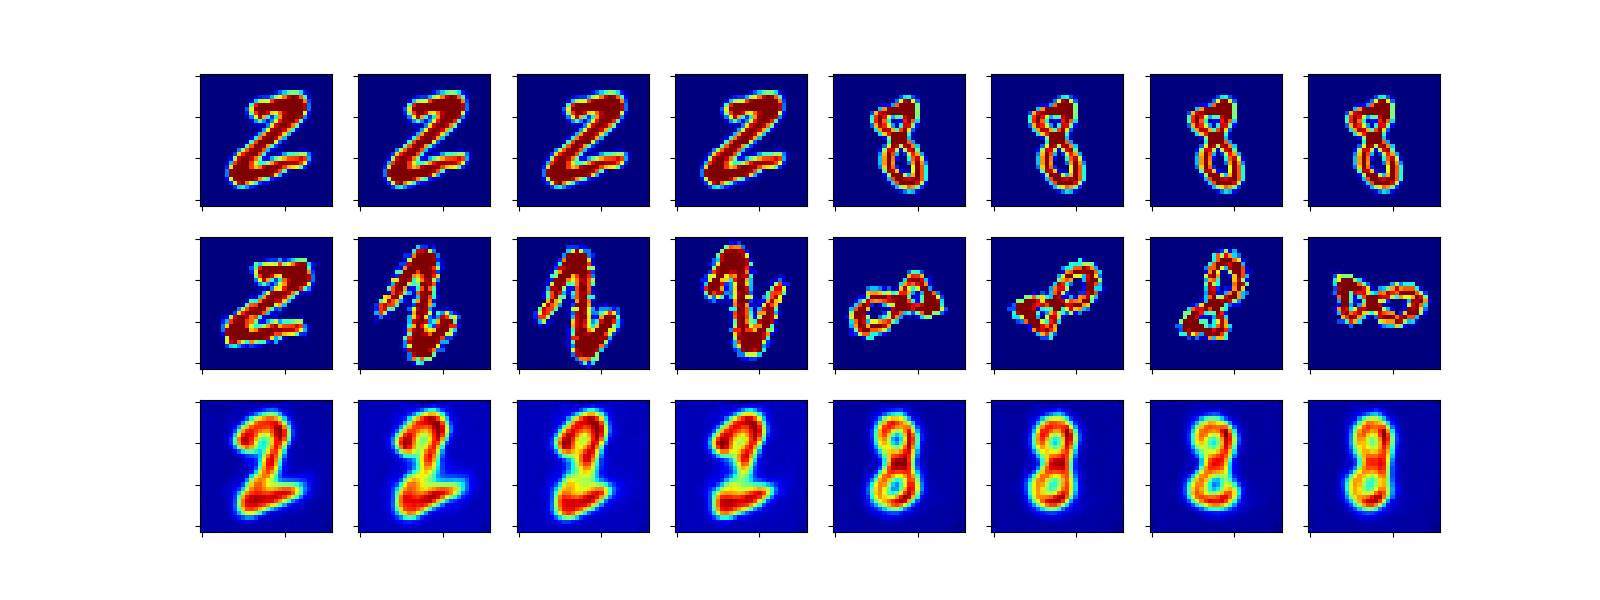

In [23]:
expname='62628198'
display_png(Image(glob.glob('./fig/*'+str(expname)+'*.png')[0]))

In [8]:
loss_list = []
for idx, expname in enumerate(["62598522", "62616795", "62628198"] ):
    logname=os.path.basename(glob.glob('./log/loss*'+str(expname)+'*.txt')[0])
    print(os.path.basename(logname))
    if idx <= 1:
        loss_list.append(_get_loss(logname))
    else:
        loss_list.append(get_loss(logname))

loss62598522.txt
loss62616795.txt
loss_62628198_nepoch-20_lr-0.01_nbatch-32_lambda1.0_dangle11569162708.txt


In [9]:
loss_array = np.concatenate(loss_list, axis=0)
loss_array.shape

(3309, 2)

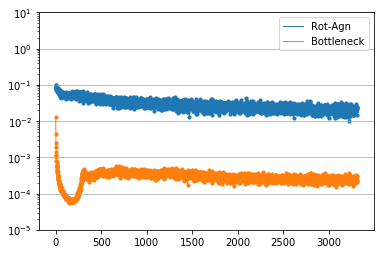

In [10]:
names = ['Rot-Agn', 'Bottleneck']
cs = ["C0", 'C1', "C2"]
for i in range(2):
    x = [ i for i in range(len(loss_array))]
    plt.plot(x,loss_array[:,i], linewidth=1, label=names[i], color=cs[i])
    plt.scatter(x,loss_array[:,i], s=10, color=cs[i])
    plt.yscale('log')
    plt.gca().yaxis.grid(True)
    plt.ylim(1.0e-5,10)
plt.legend()
plt.show()

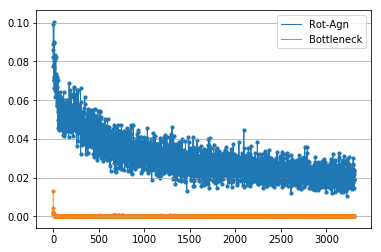

In [12]:
names = ['Rot-Agn', 'Bottleneck']
cs = ["C0", 'C1', "C2"]
for i in range(2):
    x = [ i for i in range(len(loss_array))]
    plt.plot(x,loss_array[:,i], linewidth=1, label=names[i], color=cs[i])
    plt.scatter(x,loss_array[:,i], s=10, color=cs[i])
    #plt.yscale('log')
    plt.gca().yaxis.grid(True)
    #plt.ylim(1.0e-5,10)
plt.legend()
plt.show()

In [15]:
expname='62628198'
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=19, mtype='encoder')
decoder = load_model(model_dir, epoch=19, mtype='decoder')

 Load encoder at 19 epoch
 Load decoder at 19 epoch


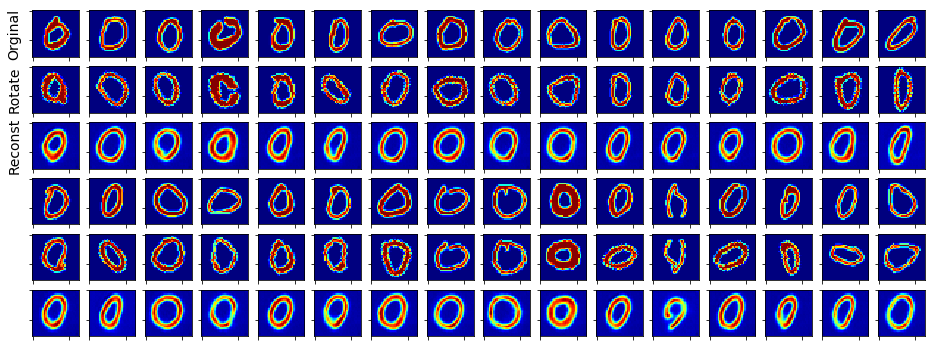

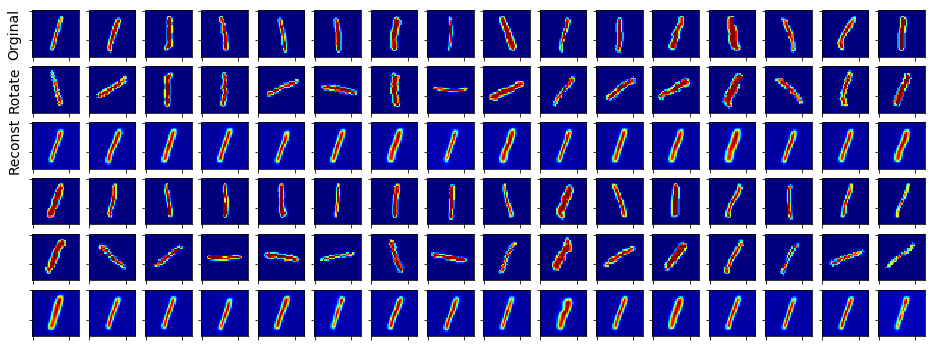

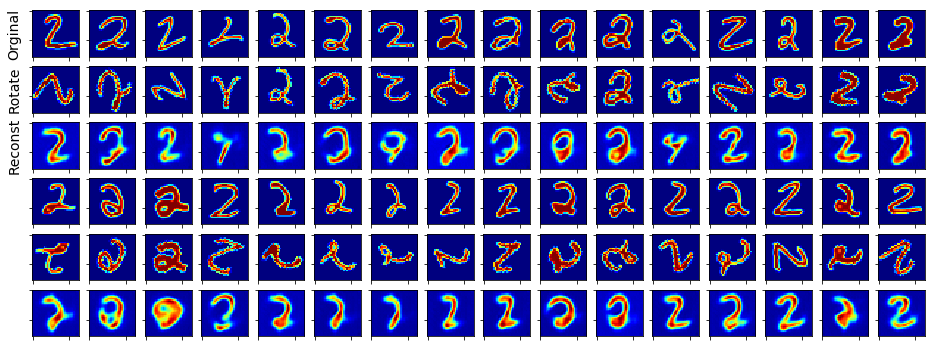

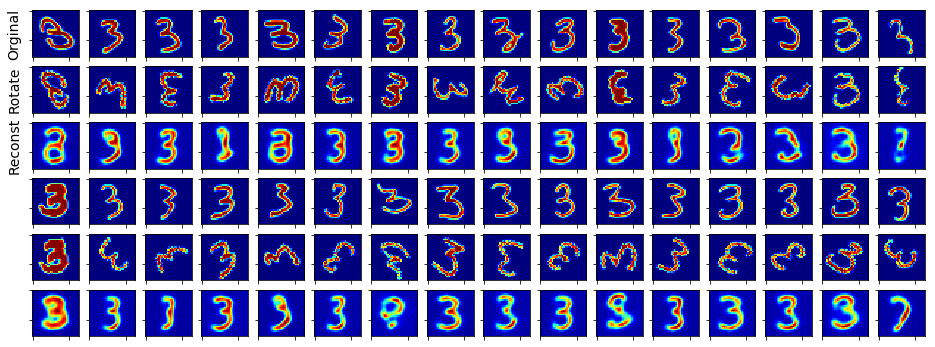

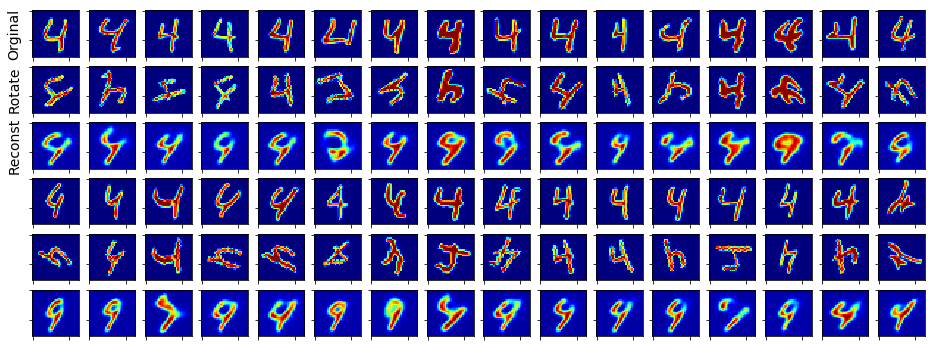

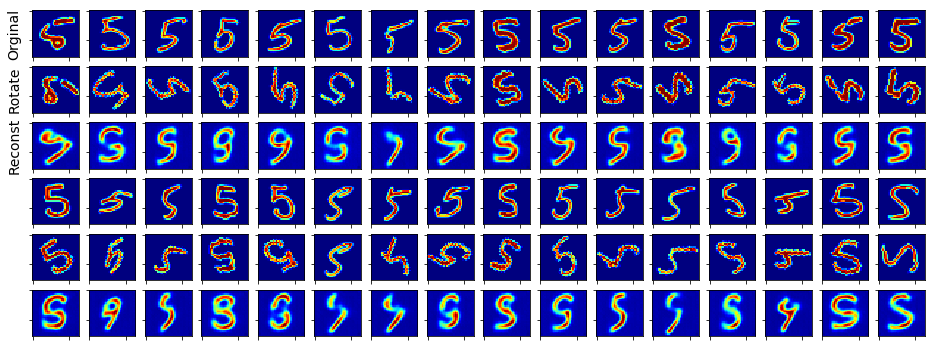

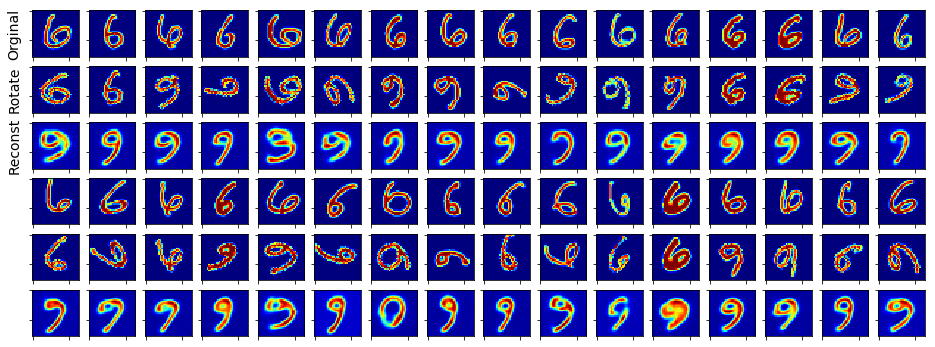

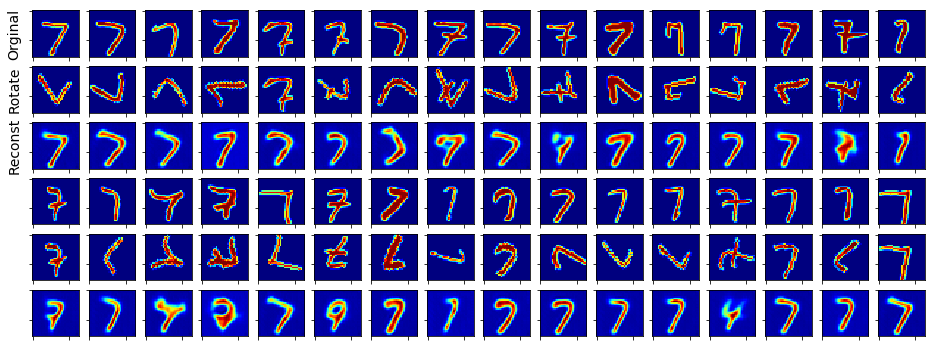

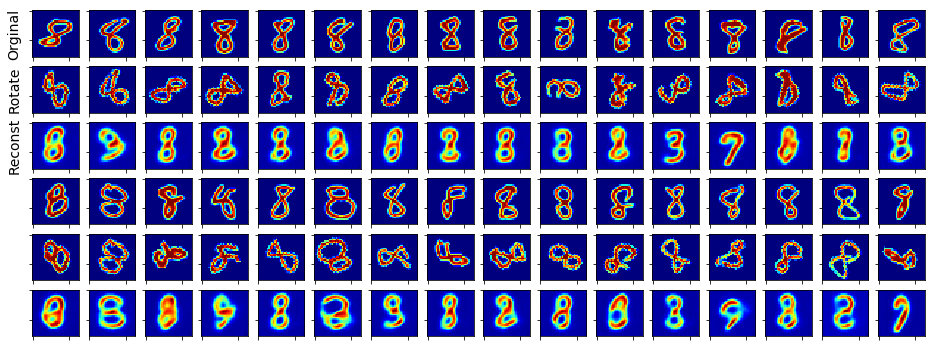

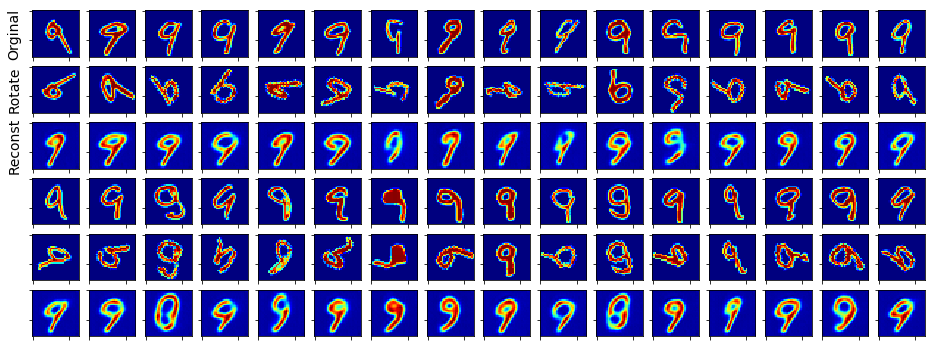

In [16]:
for digit in range(10):
    imgs = test_imgs[np.where(y_test == digit)][:32]
    rimgs_tf = rotate_fn(imgs,seed=np.random.randint(0,999), return_np=False)
    rtest_imgs = tf.keras.backend.eval(rimgs_tf)
    
    #encoded_imgs = encoder.predict(imgs)   # without rotation
    encoded_imgs = encoder.predict(rtest_imgs)    # with rotation
    results = decoder.predict(encoded_imgs)
        
    height, width = 32,32
    num_test_images = 16
    f,a=plt.subplots(6,num_test_images,figsize=(num_test_images,6))
    for idx, i in enumerate(range(num_test_images)):
        a[0][idx].imshow(np.reshape(imgs[i],(height,width)), cmap='jet')
        a[1][idx].imshow(np.reshape(rtest_imgs[i],(height,width)), cmap='jet')
        a[2][idx].imshow(np.reshape(results[i],(height,width)), cmap='jet')
        a[3][idx].imshow(np.reshape(imgs[i+16],(height,width)), cmap='jet')
        a[4][idx].imshow(np.reshape(rtest_imgs[i+16],(height,width)), cmap='jet')
        a[5][idx].imshow(np.reshape(results[i+16],(height,width)), cmap='jet')
            
        if idx == 0:
            label_list = ['Orginal', 'Rotate', 'Reconst']
            for ii in range(3):
                a[ii][idx].set_ylabel(label_list[ii], fontsize=14)
        
        for ii in range(6):
            # set axis turn off
            a[ii][idx].set_xticklabels([])
            a[ii][idx].set_yticklabels([])
    plt.show()

-------------
### Similarity of Latent Representation

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
from mpl_toolkits.mplot3d import Axes3D

In [40]:
from matplotlib.colors import LinearSegmentedColormap

In [65]:
def cos_sim_fn(rimgs, encoder):
    encoded_imgs = encoder.predict(rimgs)
    encs_list = []
    for i in range(360):
        encs_list.append(encoded_imgs[i].ravel().reshape(1,-1))
    encs_vec = np.array(encs_list)

    cos_sims = []
    x=encs_vec[0]
    for i in range(359):
        y = encs_vec[i+1]
        cos_sims.extend(cosine_similarity(x,y))
    return np.asarray(cos_sims)

In [34]:
# get images
digit_imgs = []
for digit in range(10):
    ddx = np.where(y_test == digit)
    n = np.random.randint(0,len(ddx[0]),1)
    nn = np.array(ddx)[0][n]
    digit_imgs.append(test_imgs[nn])

- 62628198

In [38]:
cos_sim_list = []
for digit in range(10):
    rimgs_list = []
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    for i in range(360):
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0)
    )
    cos_sim_list.append(cos_sim_fn(rimgs, encoder))

<Figure size 864x576 with 0 Axes>

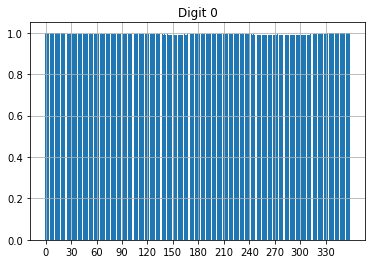

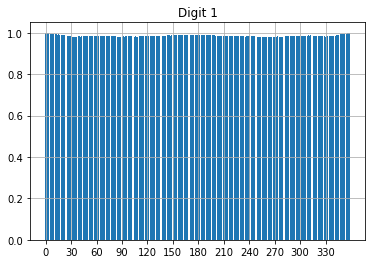

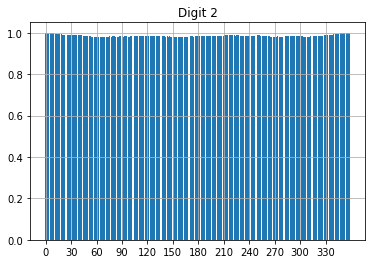

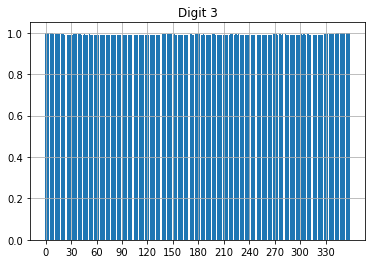

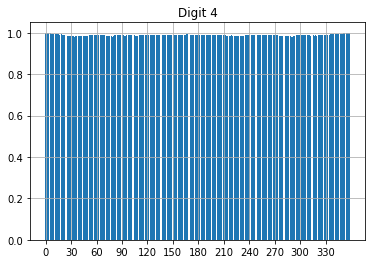

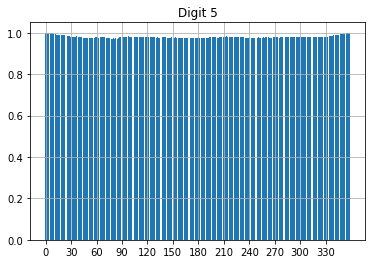

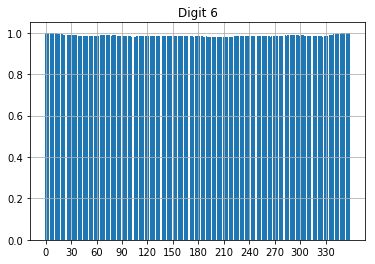

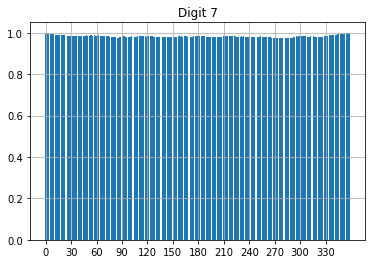

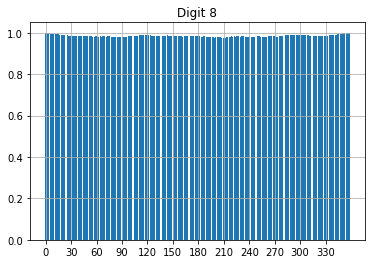

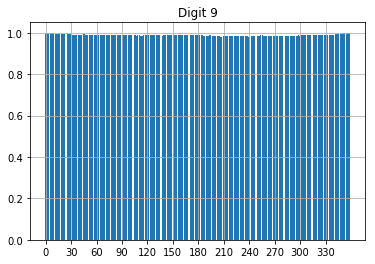

In [64]:
plt.figure(figsize=(12,8))
colors = ['navy','cornflowerblue','blue','teal',
         'aqua','palegreen', 'yellowgreen', 'darkorange',
         'yellow','orange','red','maroon']
x = np.array([i for i in range(cos_sim_list[idx].shape[0])])
for idx, (c, ys) in enumerate(zip(colors, [i*1 for i in range(10)])):
    fig = plt.figure(figsize=(6,4))
    plt.bar(x, cos_sim_list[idx].ravel())
    plt.title("Digit {}".format(idx))
    plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.grid(True)
#fig.tight_layout()
    plt.show()

-------------------------

- 62533001 (Only rotate-agnostic loss)

In [66]:
expname='62533001'
model_dir = "./output_model/"+expname
# model
encoder = load_model(model_dir, epoch=24, mtype='encoder')

 Load encoder at 24 epoch


In [67]:
cos_sim_list = []
for digit in range(10):
    rimgs_list = []
    tmp_img = digit_imgs[digit].reshape(1,32,32,1)
    for i in range(360):
        ii = i*math.pi/180
        rimgs_list.append(rotate_operation(tmp_img, ii))
    rimgs = tf.keras.backend.eval(tf.concat(rimgs_list,axis=0)
    )
    cos_sim_list.append(cos_sim_fn(rimgs, encoder))

<Figure size 864x576 with 0 Axes>

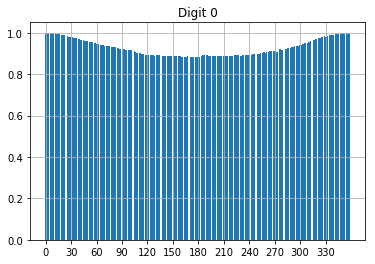

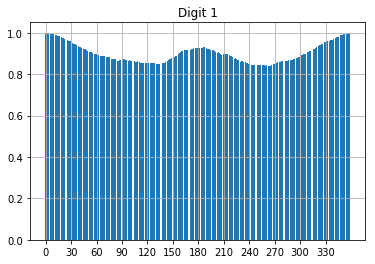

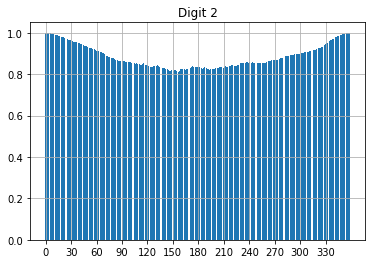

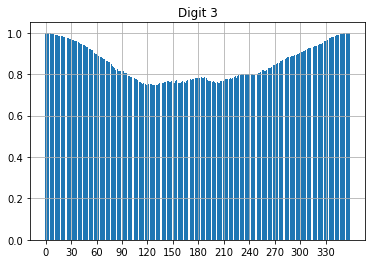

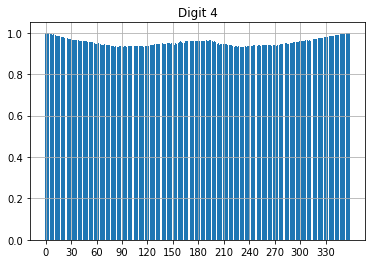

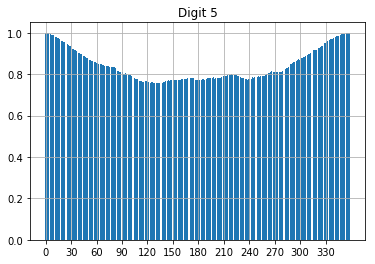

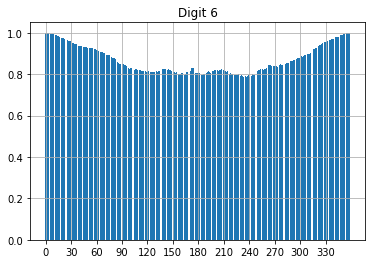

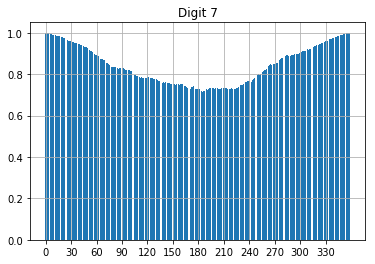

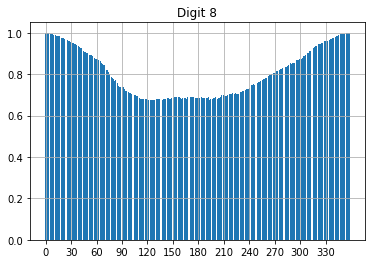

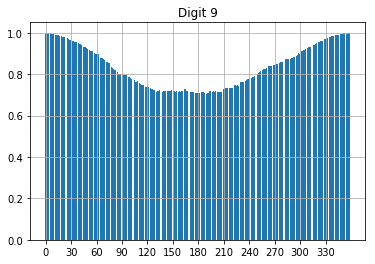

In [68]:
plt.figure(figsize=(12,8))
colors = ['navy','cornflowerblue','blue','teal',
         'aqua','palegreen', 'yellowgreen', 'darkorange',
         'yellow','orange','red','maroon']
x = np.array([i for i in range(cos_sim_list[idx].shape[0])])
for idx, (c, ys) in enumerate(zip(colors, [i*1 for i in range(10)])):
    fig = plt.figure(figsize=(6,4))
    plt.bar(x, cos_sim_list[idx].ravel())
    plt.title("Digit {}".format(idx))
    plt.xticks([i for i in range(0,359,30)], [str(i) for i in range(0,359,30)])
    plt.grid(True)
#fig.tight_layout()
    plt.show()